In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# y' = lam * y, y(0) = 1 ==> y(t) = exp(lam *t)
def implicit_midpoint(y0,lam, tf, N = 10):
    dt = tf/N
    t = 0
    time = []; time.append(t)
    ynext = y0
    y = []; y.append(ynext)
    while t + dt/2 < tf:
        ynext = (1+dt/2*lam)/(1-dt/2*lam) * ynext
        y.append(ynext)
        t += dt
        time.append(t)
    return y, time

In [3]:
y, t = implicit_midpoint(y0=1,lam=4, tf=.4)

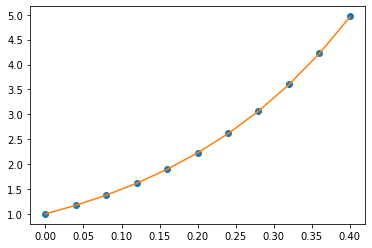

In [4]:
plt.plot(t,y,'o')
#print(t,np.exp(4*np.asarray(t)))
plt.plot(t,np.exp(4*np.asarray(t)))

In [6]:
def GaussLegendre2s(y0,lam, tf, N=10):
    dt = tf/N
    t = 0
    time = []; time.append(t)
    ynext = y0
    y = []; y.append(ynext)
    while t + dt/2 < tf:
        ynext = (1+dt/2*lam + dt**2/12*lam**2)/(1-dt/2*lam +dt**2/12*lam**2) * ynext
        y.append(ynext)
        t += dt
        time.append(t)
    return y, time

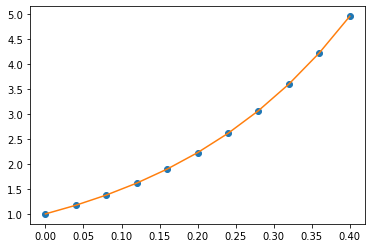

In [7]:
y, t = GaussLegendre2s(y0=1,lam=4, tf=.4)
plt.plot(t,y,'o')
#print(t,np.exp(4*np.asarray(t)))
plt.plot(t,np.exp(4*np.asarray(t)))

In [17]:
def GaussLegendre3s(y0,lam, tf, N = 10):

    dt = tf/N
    t = 0
    time = []; time.append(t)
    ynext = y0
    y = []; y.append(ynext)
    while t + dt/2 < tf:
        ynext = (1+dt/2*lam + dt**2/10*lam**2 + dt**3/120*lam**3)/(1-dt/2*lam + dt**2/10*lam**2 - dt**3/120*lam**3) * ynext
        y.append(ynext)
        t += dt
        time.append(t)
    return y, time

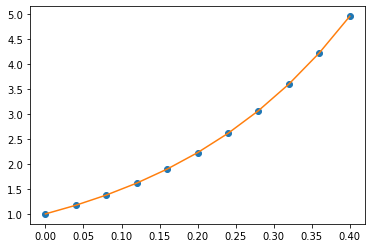

In [18]:
y, t = GaussLegendre3s(y0=1,lam=4, tf=.4)
plt.plot(t,y,'o')
#print(t,np.exp(4*np.asarray(t)))
plt.plot(t,np.exp(4*np.asarray(t)))

In [30]:
lam = 4
yexact = lambda t: np.exp(lam*t)
error1 = []
error2 = []
error3 = []
tf = 1.0
for N in [2**l for l in range(3,7)]:
    y1, t = implicit_midpoint(y0=1,lam=lam, tf=tf, N=N)
    error1_N = np.abs(y1-yexact(np.asarray(t)))
    error1.append(np.max(error1_N))
    
    y2, t = GaussLegendre2s(y0=1,lam=lam, tf=tf, N=N)
    error2_N = np.abs(y2-yexact(np.asarray(t)))
    error2.append(np.max(error2_N))
    
    y3, t = GaussLegendre3s(y0=1,lam=lam, tf=tf, N=N)
    error3_N = np.abs(y3-yexact(np.asarray(t)))
    error3.append(np.max(error3_N))
print("ERRORS:")
print(error1)
print(error2)
print(error3)
#rates
rate1 =[]
rate2 = []
rate3 = []
for j in range(1,len(error1)):
    rate1.append(np.log(error1[j]/error1[j-1])/np.log(1/2))
    rate2.append(np.log(error2[j]/error2[j-1])/np.log(1/2))
    rate3.append(np.log(error3[j]/error3[j-1])/np.log(1/2))

print(" ----------")
print("RATES:")
print(rate1)
print(rate2)
print(rate3)

ERRORS:
[4.939268043368507, 1.1604050232926895, 0.2857790276446295, 0.07117938319755979]
[0.019236330666373647, 0.001189250603140124, 7.412230425529742e-05, 4.629418683066433e-06]
[3.4183287006328555e-05, 5.302404062490496e-07, 8.269680051853356e-09, 1.2938272675455664e-10]
 ----------
RATES:
[2.0896688168091893, 2.0216564950376834, 2.0053687094220387]
[4.015708968915729, 4.004001215332852, 4.001004780922872]
[6.010500707535312, 6.002671289169991, 5.998114585365336]


# System of ODEs

\begin{equation}
y' = A y, y(0) = y0
\end{equation}

\begin{equation}
A= 
\begin{pmatrix}
2& -1& 0 \\
-1 & 2&-1 \\
0&-1&2
\end{pmatrix}
\end{equation}

In [36]:
def implicit_midpoint_system(Y0,A, tf, N = 10):
    dt = tf/N
    t = 0
    time = []; time.append(t)
    Ynext = Y0
    Y = []; Y.append(Ynext.copy())
    n = A.shape[0]
    Mstar = np.eye(n) - dt/2*A
    while t + dt/2 < tf:
        aux = dt*A.dot(Ynext)
        delta = np.linalg.solve(Mstar, aux)
        Ynext+=delta
        Y.append(Ynext.copy())
        t += dt
        time.append(t)
    return Y, time

# NEW COCKBURN'S METHOD
def implicit_midpoint_system_BC(Y_initial, A, tf, N = 1):
    # Parameters of iteration
    tol = 10**(-12)
    MAXITER = 100
    
    
    dt = tf/N
    t = 0
    time = []; time.append(t)
    Y0 = Y_initial.copy()
    Y = []; Y.append(Y0.copy())
    n = A.shape[0]
    
    while t + dt/2 < tf:
        AY0 = A.dot(Y0)
        A2Y0 = A.dot(AY0)
        A3Y0 = A.dot(A2Y0)
        # initial step
        U0 = Y0 + dt*AY0 + 0.5*dt**2*A2Y0 +0.125*dt**3*A3Y0
        print("t = ", t, " U0:", U0)
        # iterative process
        iter = 0
        Uk = U0.copy()
        error = 1
        while error>tol and iter < MAXITER:
            Ukp1 = U0 + 0.125*dt**3*(A.dot(A.dot(A.dot(Uk)))) 
            error = np.linalg.norm(Ukp1-Uk,2)
            Uk = Ukp1.copy()
            iter+=1
        print("exit iter:", iter)
        Ynext = Uk.copy()
        Y.append(Ynext.copy())
        Y0 = Ynext.copy()
        t += dt
        time.append(t)
    return Y, time

In [37]:
A = np.array([[2.0,-1,0],[-1,2,-1],[0,-1,2]], dtype=np.float64)
#A = np.array([[2.0,0,0],[0,1,-1],[0,0,3]], dtype=np.float64)
#A = np.array([[1.0]], dtype=np.float64)
Y0 = np.array([1.0,1.0,1.0])
#Y0 = np.array([1.0])
Y, t = implicit_midpoint_system(Y0=Y0.copy(),A=A, tf=1.0, N=10)
C, t = implicit_midpoint_system_BC(Y_initial=Y0.copy(),A=A, tf=1.0, N=10)
print(np.asarray(Y))
print(np.asarray(C))

t =  0  U0: [1.11075 0.989   1.11075]
exit iter: 6
t =  0.1  U0: [1.25005745 0.94646584 1.25005745]
exit iter: 6
t =  0.2  U0: [1.42752867 0.85928201 1.42752867]
exit iter: 6
t =  0.30000000000000004  U0: [1.6577178 0.7074284 1.6577178]
exit iter: 6
t =  0.4  U0: [1.96110108 0.46254373 1.96110108]
exit iter: 6
t =  0.5  U0: [2.36651081 0.08448546 2.36651081]
exit iter: 6
t =  0.6  U0: [ 2.91457107 -0.48352687  2.91457107]
exit iter: 6
t =  0.7  U0: [ 3.6625477  -1.32176826  3.6625477 ]
exit iter: 6
t =  0.7999999999999999  U0: [ 4.69119477 -2.54368815  4.69119477]
exit iter: 6
t =  0.8999999999999999  U0: [ 6.11441939 -4.30957598  6.11441939]
exit iter: 6
[[ 1.          1.          1.        ]
 [ 1.11180124  0.98757764  1.11180124]
 [ 1.25153351  0.94444659  1.25153351]
 [ 1.42960395  0.85641945  1.42960395]
 [ 1.66063849  0.70337461  1.66063849]
 [ 1.96521471  0.4568075   1.96521471]
 [ 2.37230793  0.07637332  2.37230793]
 [ 2.92274417 -0.49499396  2.92274417]
 [ 3.67407434 -1.3379724

In [46]:
N=100
A = 2*np.eye(N) -np.diag(np.ones(N-1),-1)- np.diag(np.ones(N-1),1)
Y0 = np.ones(N)
print(Y0)

Y, t = implicit_midpoint_system(Y0=Y0.copy(),A=A, tf=1.0, N=10)
C, t = implicit_midpoint_system_BC(Y_initial=Y0.copy(),A=A, tf=1.0, N=10)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
t =  0  U0: [1.110625 0.9945   1.000125 1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.       1.       1.       1.
 1.       1.

In [47]:
print(np.asarray(Y))
print(np.asarray(C))

[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 1.11145618  0.99378876  1.00034614 ...  1.00034614  0.99378876
   1.11145618]
 [ 1.24922359  0.97222249  1.00232198 ...  1.00232198  0.97222249
   1.24922359]
 ...
 [ 3.33227079 -0.17128598  1.35683223 ...  1.35683223 -0.17128598
   3.33227079]
 [ 4.12610967 -0.78873063  1.6136472  ...  1.6136472  -0.78873063
   4.12610967]
 [ 5.18034464 -1.68306021  2.02290835 ...  2.02290835 -1.68306021
   5.18034464]]
[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 1.11145618  0.99378876  1.00034614 ...  1.00034614  0.99378876
   1.11145618]
 [ 1.24922359  0.97222249  1.00232198 ...  1.00232198  0.97222249
   1.24922359]
 ...
 [ 3.33227079 -0.17128598  1.35683223 ...  1.35683223 -0.17128598
   3.33227079]
 [ 4.12610967 -0.78873063  1.6136472  ...  1.6136472  -0.78873063
   4.12610967]
 [ 5.18034464 -1.68306021  2.02290835 ...  2.02290835 -1.68306021
   5.18034464]]


In [6]:
import numpy as np
import sympy as sym
AT = np.array([[1/4,1/4-np.sqrt(3)/6],[1/4+np.sqrt(3)/6,1/4]])
z = sym.symbols('z')
print(np.linalg.det(np.eye(2) - z*AT))

UFuncTypeError: Cannot cast ufunc 'det' input from dtype('O') to dtype('float64') with casting rule 'same_kind'